<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_04_classifi_creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection
### Under sampling and Over sampling
해당 데이터 세트의 레이블인 Class 속성은 매우 불균형한 분포를 가지고 있음.
Class는 0과 1로 분류 되는데, 0은 정상, 1은 신용카드 사기 트랜잭션을 의미.
전체 데이터의 약 0.172%만이 사기 트랜잭션.

지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요한데,
대표적으로 언더 샘플링과 오버 샘플링이 있음.
오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용됨.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/credit_crad_fraud_detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DF를 복사한 뒤 Time 컬럼만 삭제하고 복사된 DF를 반환
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [ ]:
# 사전 데이터 가공 후 학습과 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None) :
    # 인자로 입력된 DF의 사전 데이터 가공이 완료된 복사 DF 반환
    df_copy = get_preprocessed_df(df)
    
    # DF의 맨마지막 컬럼이 레이블, 나머지는 피처들
    x_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    
    # train_test_split() 으로 학습과 테스트 데이터 분할
    # stratify = y_target으로 Stratified 기반 분할
    x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, \
                                                        random_state=0, stratify = y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = get_train_test_dataset(df)
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts() / y_train.shape[0] * 100)
print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0] * 100)
print('y_train.shape:', y_train.shape)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64
y_train.shape: (199364,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차행렬')
    print(confusion)
    print('\n 정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\
            F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# print(x_train.info())
# print('n y_train \n')
# print(y_train)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85280    15]
 [   55    93]]

 정확도:0.9992, 정밀도:0.8611, 재현율:0.6284,            F1:0.7266, AUC:0.9568


In [ ]:
# 인자로 사이킷런의 Estimator 객체와 학습 / 테스트 데이터 세트를 입력 받아서 학습 / 예측 / 평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

**주의**  
LightGBM 이 버전업 되면서 ```boost_from_average``` 파라미터의 디폴트 값이 False 에서 True 로 변경되었습니다. 본 예제와 같이 레이블 값이 극도로 불균형한 분포를 이루는 경우 ```boost_from_average=True``` 설정은 재현율(Recall) 및 ROC-AUC 성능을 매우 크게 저하시킵니다.

LightGBM 2.1.0 이상의 버전이 설치되어 있거나 불균형한 데이터 세트에서 예측 성능이 매우 저조할 경우 LGBMClassifier 객체 생성 시 ```boost_from_average=False``` 로 파라미터를 설정해야 합니다.


[LightGBM Issue 참조](https://github.com/Microsoft/LightGBM/issues/1487)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=True)

get_model_train_eval(lgbm, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

# boost_from_average=False 로 입력 시 결과값
# 오차행렬
# [[85289     6]
#  [   36   112]]
#  정확도:0.9995, 정밀도:0.9492, 재현율:0.7568,            F1:0.8421, AUC:0.9797


# boost_from_average=True 로 입력 시 결과값
# 오차행렬
# [[85261    34]
#  [   74    74]]
#  정확도:0.9987, 정밀도:0.6852, 재현율:0.5000,            F1:0.5781, AUC:0.7531

오차행렬
[[85261    34]
 [   74    74]]

 정확도:0.9987, 정밀도:0.6852, 재현율:0.5000,            F1:0.5781, AUC:0.7531


#### 데이터 분포도 변환 후 모델 학습/예측/평가

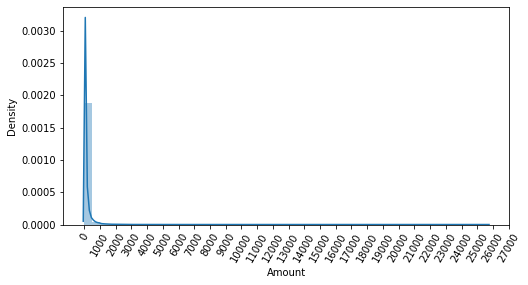

In [ ]:
# Amount 피처의 분포도 확인
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(df['Amount'])

위 그래프 확인 시 1000불 이하인 데이터가 대부분이며, 27,000불까지 드물지만 많은 금액을 사용한 경우가 발생하면서 꼬리가 긴 분포 곡선을 가지고 있음.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    # 변환된 Amount를 Amount_scaled로 피처명 변경 후 DF 맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
x_train, x_test, y_train, y_test = get_train_test_dataset(df)

# print(x_train)
print('### 로지스틱 회귀 예측 성능 ###')
# kaggle 에서 아래 LR의 인자 (solver='liblinear')  안 넣으면 아래의 오류남
# AttributeError: 'str' object has no attribute 'decode'
lr = LogisticRegression(solver='liblinear')
get_model_train_eval(lr, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ####')
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]

 정확도:0.9992, 정밀도:0.8654, 재현율:0.6081,            F1:0.7143, AUC:0.9707
### LightGBM 예측 성능 ####
오차행렬
[[85289     6]
 [   36   112]]

 정확도:0.9995, 정밀도:0.9492, 재현율:0.7568,            F1:0.8421, AUC:0.9773


In [ ]:
# Amount 피처를 Log 변환하여 분포의 왜곡을 개선
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    
    # numpy의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
x_train, x_test, y_train, y_test = get_train_test_dataset(df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85283    12]
 [   58    90]]

 정확도:0.9992, 정밀도:0.8824, 재현율:0.6081,            F1:0.7200, AUC:0.9721

### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   35   113]]

 정확도:0.9995, 정밀도:0.9576, 재현율:0.7635,            F1:0.8496, AUC:0.9786


#### 이상치 데이터 제거 후 모델 학습/예측/평가
**IQR**을 이용한 이상치 제거

![iqr-desc](https://user-images.githubusercontent.com/291782/139607045-133fdcb6-2b82-4b76-ad7d-c1f968059a8b.png)
> 출처 : 파이썬 머신러닝 완벽 가이드 p.272

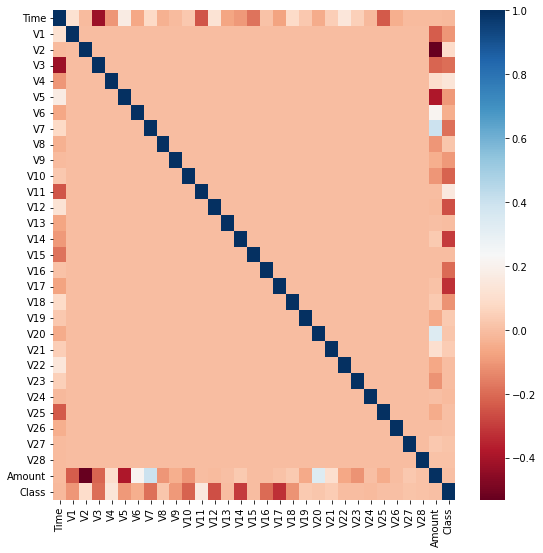

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = df.corr()

# cmap='RdBu' 양의 상관관계가 높을수록 짙은 파란색, 음의 상관관계가 높을수록 짙은 붉은색
sns.heatmap(corr, cmap='RdBu')

위 이미지에서 Class 피처와 음의 상관관계가 높은 피처는 V14, V17.

이 중에서 V14에 대해서만 이상치를 찾아서 제거해 보겠음

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5) :
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4분위 지점을 np.percentile로 구함
    fraud = df[df['Class'] == 1][column]
    print('## fraud data start ##')
    print(fraud)
    print('## fraud data end ##')
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값 보다 작은 값을 이상치 데이터로 설정하고 DF index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

## fraud data start ##
541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64
## fraud data end ##
이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    print('이상치 데이터 인덱스:', outlier_index)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [ ]:
x_train, x_test, y_train, y_test = get_train_test_dataset(df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

print('\n### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm, ftr_train=x_train, ftr_test=x_test, tgt_train=y_train, tgt_test=y_test)

## fraud data start ##
541      -4.289254
623      -1.692029
4920     -1.470102
6108     -6.771097
6329     -6.079337
            ...   
279863   -6.665177
280143   -5.210141
280149   -4.057162
281144   -6.416628
281674   -1.948883
Name: V14, Length: 492, dtype: float64
## fraud data end ##
이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')
### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85282    13]
 [   48    98]]

 정확도:0.9993, 정밀도:0.8829, 재현율:0.6712,            F1:0.7626, AUC:0.9747

### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]

 정확도:0.9997, 정밀도:0.9680, 재현율:0.8288,            F1:0.8930, AUC:0.9831


#### SMOTE 오버 샘플링 적용 후 모델 학습 / 예측 / 평가

SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야함.  
검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증 / 테스트가 될 수 없음.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2)

# kaggle 에서는 아래 smote.fit_sample(x_train, y_train) 실행 시 아래 오류 발생
# AttributeError: 'SMOTE' object has no attribute 'fit_resample'
# 관련 링크 URL : https://github.com/scikit-learn-contrib/imbalanced-learn/issues/528
x_train_over, y_train_over = smote.fit_sample(x_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트\n x_train:', x_train.shape, '\n y_train:', y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트
 x_train: (199362, 29) 
 y_train: (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 1    199020
0    199020
dtype: int64


In [ ]:
lr = LogisticRegression()

# ftr_train 과 tgt_train 인자값이 SMOTE 증식된 x_train_over, y_train_over 로 변경됨에 유의
get_model_train_eval(lr, ftr_train=x_train_over, ftr_test=x_test, tgt_train=y_train_over, tgt_test=y_test)

# 위 실행 시 재현율은 높아지지만, 정밀도가 5%로 급격하게 낮아짐
# 오차행렬
# [[82942  2353]
#  [   11   135]]
#  정확도:0.9723, 정밀도:0.0543, 재현율:0.9247,            F1:0.1025, AUC:0.9736

오차행렬
[[82942  2353]
 [   11   135]]

 정확도:0.9723, 정밀도:0.0543, 재현율:0.9247,            F1:0.1025, AUC:0.9736


In [ ]:
# 정밀도와 재현율의 상관관계 형태를 시각화
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # x 축을 threshold 값으로, y 축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x 축, y 축 label 과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

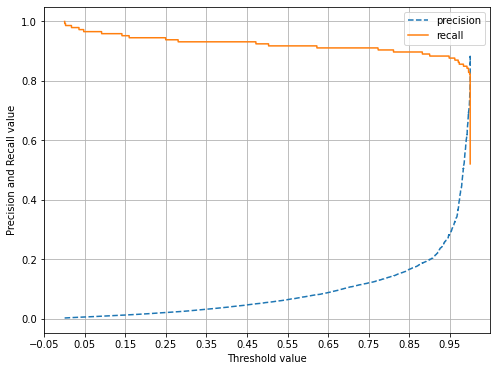

In [ ]:
# 재현율과 정밀도의 관계를 파악하기 위해 시각화
precision_recall_curve_plot(y_test, lr.predict_proba(x_test)[:, 1])

In [ ]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

get_model_train_eval(lgbm, ftr_train=x_train_over, ftr_test=x_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬
[[85291     4]
 [   26   120]]

 정확도:0.9996, 정밀도:0.9677, 재현율:0.8219,            F1:0.8889, AUC:0.9794


In [ ]:
# SMOTE 의 fit_sample() 함수 오류로 인해 시스템 파악을 위해 작성
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
NumPy 1.19.5
SciPy 1.4.1
Scikit-Learn 0.22.2.post1


In [ ]:
# 10 스태킹 앙상블 부분은 건너뜀. (P.278)
# 다음에 자세히 봐라